In [1]:
import pydataset
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import r2_score

from scipy.stats import linregress

import evaluate

In [6]:
tips = pydataset.data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips['baseline'] = tips['tip'].mean()
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


In [8]:
model = LinearRegression().fit(tips[['total_bill']], tips.tip)
tips['yhat'] = model.predict(tips[['total_bill']])

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


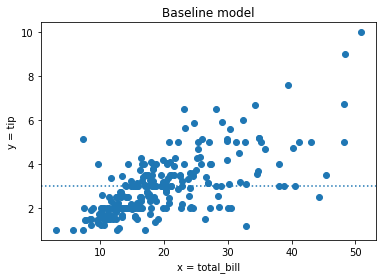

In [6]:
# plot data with baseline:
plt.scatter(tips.total_bill, tips.tip)
plt.axhline(tips.tip.mean(), ls = ':')
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('Baseline model');


'''
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)
sns.lineplit(x = 'total_bill', y = 'baseline', data = tips)
sns.lineplit(x = 'total_bill', y = 'yhat', data = tips)
'''

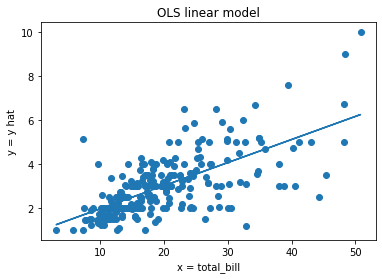

In [7]:
plt.scatter(tips.total_bill, tips.tip)
plt.plot(tips.total_bill, tips.yhat)
plt.xlabel('x = total_bill')
plt.ylabel('y = y hat')
plt.title('OLS linear model');

In [10]:
tips['residuals'] = tips.tip - tips.yhat
tips['residual_baseline'] = tips.tip - tips.baseline
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residuals,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


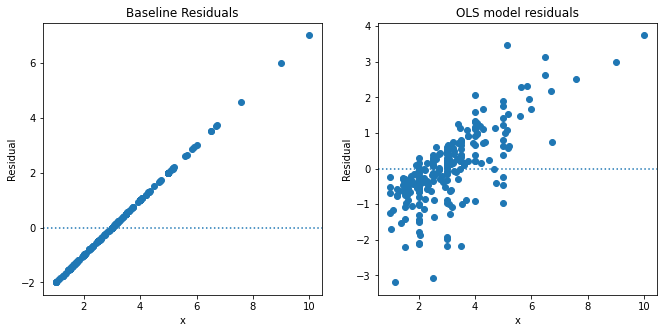

In [11]:
plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(tips.tip, tips.residual_baseline)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(tips.tip, tips.residuals)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

### SSE

In [12]:
tips['residual^2'] = tips.residuals**2
tips['baseline_residual^2'] = tips.residual_baseline**2

tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residuals,residual_baseline,residual^2,baseline_residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [13]:
SSE = tips['residual^2'].sum()
SSE_baseline = tips['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 252.8
SSE Baseline = 465.2


### MSE

In [17]:
tips.shape

(244, 13)

In [14]:
MSE = SSE/len(tips)
MSE_baseline = SSE_baseline/len(tips)

print("MSE = ", "{:.4f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  1.0360
MSE baseline =  1.9


### RMSE

In [15]:

RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.4f}".format(RMSE))
print("RMSE baseline = ", "{:.4f}".format(RMSE_baseline))

RMSE =  1.0179
RMSE baseline =  1.3808


In [17]:
ESS = SSE_baseline
ESS

465.2124770491804

In [21]:
def evaluation_of_see(model, baseline):
    if model < baseline:
        print("The SSE is better on the model")
    else:
        print("The SSE is better on the baseline revise model")

In [23]:
evaluation_of_see(SSE, SSE_baseline)

The SEE is better on the model


### R2_SCore == Variance

In [19]:
# More means the models is doing better at predicting than baseline
r2_score(tips.tip, tips.yhat)

0.45661658635167657

In [20]:
r2_score(tips.tip, tips.baseline)

1.1102230246251565e-16

# Test new python scripts for evaluate functions

In [2]:
mpg = pydataset.data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
lm = LinearRegression(normalize=True)

lm.fit(mpg[['displ']], mpg.hwy)

# make prediction
mpg['yhat'] = lm.predict(mpg[['displ']])


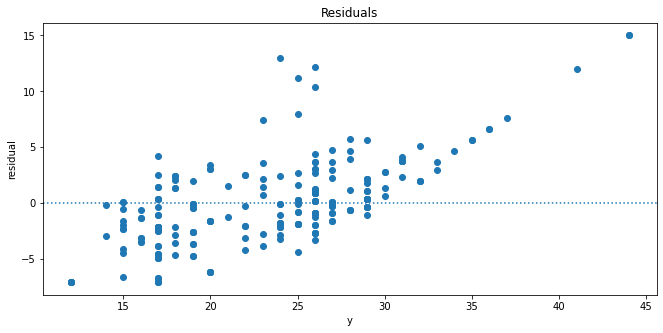

In [21]:
evaluate.plot_residuals(mpg.hwy, mpg.yhat)

In [4]:
SSE, ESS, TSS, MSE, RMSE = evaluate.regression_errors(mpg.hwy, mpg.yhat)
print('SEE :',SSE)
print('\nESS :',ESS)
print('\nTSS :',TSS)
print('\nMSE :',MSE)
print('\nRMSE :',RMSE)

SEE : 3413.829008995466

ESS : 4847.833384166925

TSS : 8261.66239316239

MSE : 14.589012858954984

RMSE : 3.819556631201452


In [22]:
stats_tests = evaluate.regression_errors(mpg.hwy, mpg.yhat)

In [26]:
stats_tests[0]

3413.829008995466

In [5]:
SSE_baseline, MSE_baseline, RMSE_baseline = evaluate.baseline_mean_errors(mpg.hwy)
print('SEE Basline :',SSE_baseline)
print('\nMSE Baseline :',MSE_baseline)
print('\nRMSE Baseline :',RMSE_baseline)

SEE Basline : 8261.66239316239

MSE Baseline : 35.30624954342902

RMSE Baseline : 5.941906221359356


In [6]:
evaluate.better_than_baseline(SSE, SSE_baseline)

True

In [18]:
slope, intercept, r, p, se = linregress(mpg.hwy, mpg.yhat)

print("R^^2 Value: ", r**2)
print("P-Value: ", p)

R^^2 Value:  0.5867866723989037
P-Value:  2.038974455591221e-46


In [19]:
results = linregress(mpg.hwy, mpg.yhat)

In [ ]:
results.pvalue

In [4]:
evaluate.rval_p_significance(mpg.hwy, mpg.yhat)

'P-Value : 2.038974455591221e-46 \nR^2 Value: 0.5867866723989037'

In [ ]:
ss = pd.DataFrame(np.array(['SSE','ESS','TSS']), columns=['metric'])
ss['model_values'] = np.array([SSE[0], ESS, TSS[0]])

# compute and add the baseline values to the dataframe
ESS_baseline = sum((mpg.yhat_baseline - mpg.y.mean())**2)
SSE_baseline = df_baseline_eval[df_baseline_eval.metric=='SSE_baseline']['model_error'][0]
TSS_baseline = ESS_baseline + SSE_baseline



ss['model_values'] = np.array([SSE_baseline, ESS_baseline, TSS_baseline])

ss